## **Disease Detection using Symptoms and Treatment recommendation**

This notebook contains all the models applied on the scraped dataset and contains the accuracy comparison plot.


In [1]:
# all necessary imports
import warnings
from decimal import Decimal
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
# ignore warnings generated due to usage of old version of tensorflow
warnings.simplefilter("ignore")

**Disease Symptom dataset** was created in a separate python program.

**Dataset scrapping** was done using **NHP website** and **wikipedia data**

In [2]:
# Load Dataset scraped from NHP (https://www.nhp.gov.in/disease-a-z) & Wikipedia
# Scrapping and creation of dataset csv is done in a separate program
df_comb = pd.read_csv("../dis_sym_dataset_comb.csv")

# creation of features and label for training the models
X = df_comb.iloc[:, 1:].values
Y = df_comb.iloc[:, 0:1].values

In [3]:
X.shape

(51963, 687)

In [3]:
X=np.nan_to_num(X)

*Train Test Split*

In [24]:
# splitting data for training the classifiers and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [25]:
# lists used for accuracy plots
accuracy_list = []
cross_accuracy_list = []
model_list = []

# **Multinomial Naive Bayes Classifier**

MNB works better on discrete features and the multinomial distribution usually requires integer counts. However, it also works with fractional counts such tf-idf.

In [26]:
# Multinomial NB Classifier
mnb = MultinomialNB()
mnb = mnb.fit(X, Y)
# prediction of labels for the test data
mnb_pred = mnb.predict(x_test)
# calculation of accuracy score based on predictions performed
# converting to Decimal as rounding with float is inaccurate
acc_mnb = round(Decimal(accuracy_score(y_test, mnb_pred) * 100), 2)
accuracy_list.append(acc_mnb)
model_list.append("MNB")
print(f"Accuracy (MNB) : {acc_mnb}%")

# Cross Validation Accuracy MNB
# performing cross validation with 5 different splits
scores_mnb = cross_val_score(mnb, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_mnb.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MNB): {score}%")

Accuracy (MNB) : 86.84%
Cross Validation Accuracy (MNB): 85.72%


# **Random Forest Classifier**

RF classifier is an estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and take the average to improve predicting accuracy.

In [27]:
# RF Classifier
rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
rf = rf.fit(X, Y)
# prediction of labels for the test data
rf_pred = rf.predict(x_test)
acc_rf = round(Decimal(accuracy_score(y_test, rf_pred) * 100), 2)
accuracy_list.append(acc_rf)
model_list.append("RF")
print(f"Accuracy (RF) : {acc_rf}%")

# Cross Validation Accuracy RF
# performing cross validation with 5 different splits
scores_rf = cross_val_score(rf, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_rf.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (RF): {score}%")

Accuracy (RF) : 88.15%
Cross Validation Accuracy (RF): 83.82%


# **K-Nearest Neighbor Classifier**

The principle behind nearest neighbor method is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. No. of samples used here is 7.

In [28]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
knn = knn.fit(X, Y)
# prediction of labels for the test data
knn_pred = knn.predict(x_test)
acc_knn = round(Decimal(accuracy_score(y_test, knn_pred) * 100), 2)
accuracy_list.append(acc_knn)
model_list.append("KNN")
print(f"Accuracy (KNN) : {acc_knn}%")

# Cross Validation Accuracy KNN
# performing cross validation with 5 different splits
scores_knn = cross_val_score(knn, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_knn.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (KNN): {score}%")

Accuracy (KNN) : 88.53%
Cross Validation Accuracy (KNN): 83.30%


# **Logistic Regression Classifier**

Logistic Regression uses OvR (One Vs Rest) approach when classification is multi class.

In [29]:
# LR Classifier
lr = LogisticRegression()
lr = lr.fit(X, Y)
# prediction of labels for the test data
lr_pred = lr.predict(x_test)
acc_lr = round(Decimal(accuracy_score(y_test, lr_pred) * 100), 2)
accuracy_list.append(acc_lr)
model_list.append("LR")
print(f"Accuracy (LR) : {acc_lr}%")

# Cross Validation Accuracy LR
# performing cross validation with 5 different splits
scores_lr = cross_val_score(lr, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_lr.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (LR): {score}%")

AttributeError: 'str' object has no attribute 'decode'

# **Support Vector Machine Classifier**

SVM follows OvO (One Vs One) scheme when dealing with multi class classification. SVM classifier works by drawing a straight line between two classes. All the data points that fall on one side of the line will be labeled as one class and all the points that fall on the other side will be labeled as the second. This seems simple for binary class but the complexity is increased when we have multiple classes. In our classification problem we have 261 classes (equal to diseases).

In [ ]:
# SVM Classifier
svm = SVC()
svm = svm.fit(X, Y)
# prediction of labels for the test data
svm_pred = svm.predict(x_test)
acc_svm = round(Decimal(accuracy_score(y_test, svm_pred) * 100), 2)
accuracy_list.append(acc_svm)
model_list.append("SVM")
print(f"Accuracy (SVM) : {acc_svm}%")

# Cross Validation Accuracy SVM
# performing cross validation with 5 different splits
scores_svm = cross_val_score(svm, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_svm.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (SVM): {score}%")

# **Decision Tree Classifier**

DT is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression. DT follows a tree like structure to reach to a decision whether the given sample under consideration belong to which class.

In [ ]:
# DT Classifier
dt = DecisionTreeClassifier()
dt = dt.fit(X, Y)
# prediction of labels for the test data
dt_pred = dt.predict(x_test)
acc_dt = round(Decimal(accuracy_score(y_test, dt_pred) * 100), 2)
accuracy_list.append(acc_dt)
model_list.append("DT")
print(f"Accuracy (DT) : {acc_dt}%")

# Cross Validation Accuracy DT
# performing cross validation with 5 different splits
scores_dt = cross_val_score(dt, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_dt.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (DT): {score}%")

# **Multilayer Perceptron Classifier**

MLP is a feed forward ANN (Artificial Neural Network) which is extensively used for classification purpose.

In [ ]:
# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(32, 32, 32), activation='relu', solver='adam', max_iter=50)
mlp = mlp.fit(X, Y)
# prediction of labels for the test data
mlp_pred = mlp.predict(x_test)
acc_mlp = round(Decimal(accuracy_score(y_test, mlp_pred) * 100), 2)
accuracy_list.append(acc_mlp)
model_list.append("MLP")
print(f"Accuracy (MLP) : {acc_mlp}%")

# Cross Validation Accuracy MLP
# performing cross validation with 5 different splits
scores_mlp = cross_val_score(mlp, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_mlp.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MLP): {score}%")

# **Accuracy Comparison Plot for all the classifiers**

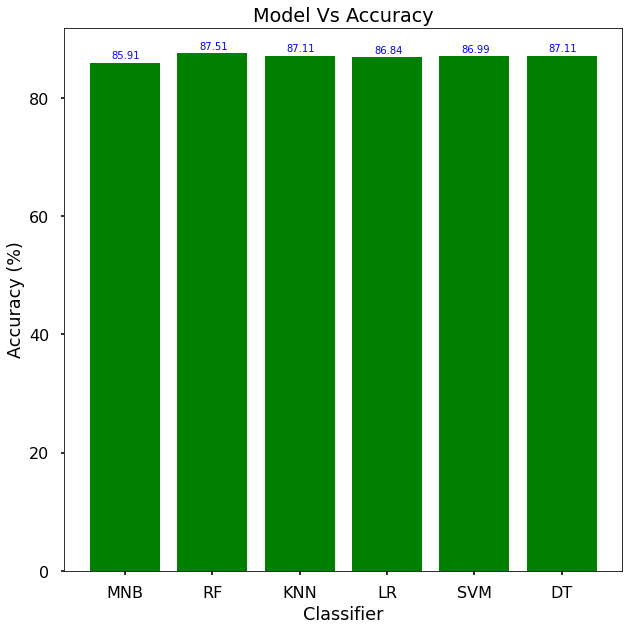

In [12]:
# comparison plot for all classifiers with their accuracy
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.title("Model Vs Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(model_list, accuracy_list, color='green')
for i, j in enumerate(accuracy_list):
    ax.text(float(i)-0.15, float(j)+0.7, str(j), color='blue')
plt.show()

# **Cross Validation Accuracy Comparison Plot for all the classifiers**

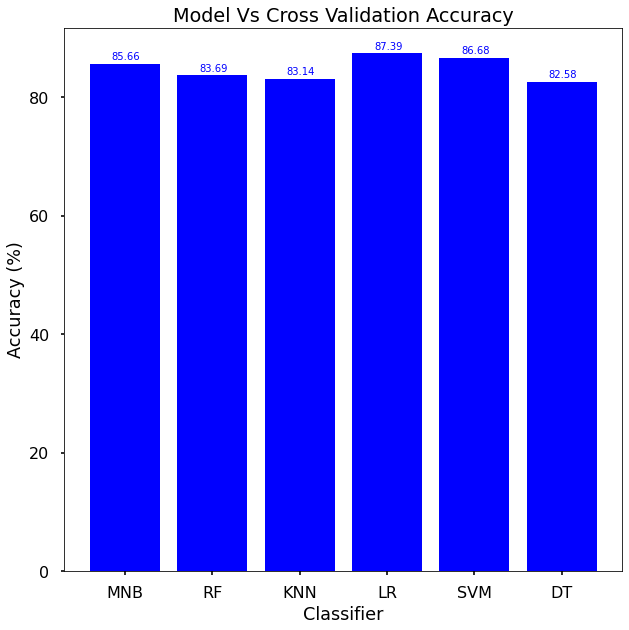

In [13]:
# comparison plot for all classifiers with their accuracy
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.title("Model Vs Cross Validation Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(model_list, cross_accuracy_list, color='blue')
for i, j in enumerate(cross_accuracy_list):
    ax.text(float(i)-0.15, float(j)+0.7, str(j), color='blue')
plt.show()